In [ ]:
#all the used libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 


In [17]:
#redaing the data 
data = pd.read_csv('../data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#scaling the Amount to match the other numbers 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time', 'Amount'] , axis=1 , inplace=True)

#separating for later use dropping 'Class' for unsupervised learning 
y = data['Class']
X = data.drop(['Class'], axis = 1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [19]:
#training the model 
from sklearn.ensemble import IsolationForest

#define the model (iso_forest)
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

#train the model (fit) the model returns 1 for normal and -1 for anomaly 
y_pred = iso_forest.fit_predict(X)

#check results 
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(-1): np.int64(2849), np.int64(1): np.int64(281958)}


In [20]:
#map -1(model anomaly) to 1(true anomaly) and 1(model safe) to 0(true safe)
y_pred_mapped = [1 if x== -1 else 0 for x in y_pred]

#evaluate
from sklearn.metrics import classification_report,confusion_matrix

print('Confusion Matrix : ')
print(confusion_matrix(y, y_pred_mapped))
print('\nReport : ')
print(classification_report(y,y_pred_mapped))

Confusion Matrix : 
[[281746   2569]
 [   212    280]]

Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.57      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.78      0.58    284807
weighted avg       1.00      0.99      0.99    284807



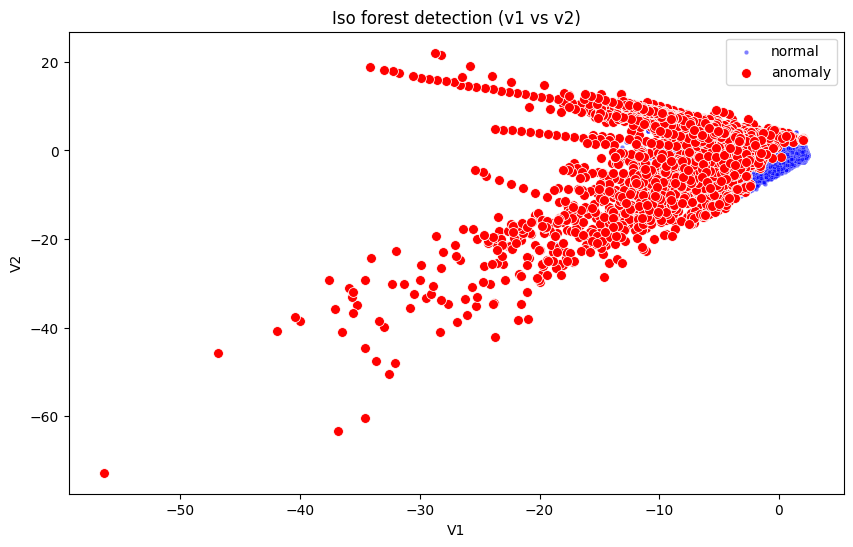

In [22]:
#scatter plot to visualise 
X['anomaly_prediction'] = y_pred_mapped

plt.figure(figsize=(10,6))

#normal transactions
sns.scatterplot(data=X[X['anomaly_prediction'] == 0] , x='V1', y='V2' ,
                color = 'blue' , label='normal', alpha=0.5, s=10)

sns.scatterplot(data=X[X['anomaly_prediction'] == 1] , x='V1', y='V2' ,
                color = 'red' , label='anomaly', s=50)

plt.title('Iso forest detection (v1 vs v2)')
plt.legend()
plt.show()

In [24]:
#hyperparameter tuning to see which contamination gives best recall 
contamination_settings = [0.001, 0.005, 0.01,0.015,0.018, 0.02, 0.05]

from sklearn.metrics import f1_score
print("Searching for best contamination parameter...")
print(f"{'Contamination':<15} {'Recall':<10} {'Precision':<10} {'F1-Score':<10}")
print("-" * 50)

for c in contamination_settings:
    #train the model for each contamination value
    model = IsolationForest(n_estimators=100, contamination=c, random_state=42)
    y_pred_loop = model.fit_predict(X)
    
    #map the predictions
    y_pred_mapped_loop = [1 if x == -1 else 0 for x in y_pred_loop]
    
    #calculate the scores
    report = classification_report(y, y_pred_mapped_loop, output_dict=True)
    recall = report['1']['recall']
    precision = report['1']['precision']
    f1 = report['1']['f1-score']
    
    print(f"{c:<15} {recall:.3f}      {precision:.3f}       {f1:.3f}")


Searching for best contamination parameter...
Contamination   Recall     Precision  F1-Score  
--------------------------------------------------
0.001           0.167      0.288       0.211
0.005           0.392      0.135       0.201
0.01            0.561      0.097       0.165
0.015           0.620      0.071       0.128
0.018           0.652      0.063       0.114
0.02            0.661      0.057       0.105
0.05            0.848      0.029       0.057


In [27]:
#lets save the best model with contamination = 0.018 
import joblib

best_model = IsolationForest(n_estimators=100, contamination=0.018, random_state=42)
best_model.fit(X)

#save 
joblib.dump(best_model, '../credit_card_model.pkl')

print('Final model saved')

Final model saved
